# 초기 설정 및 모듈 불러오기

In [1]:
import warnings 

warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic') 
plt.style.use("ggplot")
pd.set_option('mode.chained_assignment',  None)

# COVID19 진행 상황

In [4]:
# raw 코로나 데이터 불러오기

covid_data=pd.read_csv('data/Covid_case.csv')

In [5]:
# 필요 칼럼만 추출
# 코로나 일별 확진자 수 칼럼 추가
# 정수형 stateDt를 Datetime형 stateDt로 변환 후 인덱스로 설정

covid_data['daily_decideCnt']=covid_data.decideCnt.shift()-covid_data.decideCnt
covid_data_new=covid_data[['stateDt','daily_decideCnt','decideCnt','deathCnt']]
covid_data_new.index=pd.to_datetime(covid_data_new['stateDt'],format='%Y%m%d')
covid_data_new=covid_data_new.drop('stateDt',axis=1)
covid_data_new['year']=covid_data_new.index.year
covid_data_new['month']=covid_data_new.index.month
covid_data_new.head()

,daily_decideCnt,decideCnt,deathCnt,year,month
stateDt,,,,,
2021-09-25,NaN,298401,2441.0,2021,9
2021-09-24,3269.0,295132,2434.0,2021,9
2021-09-23,2433.0,292699,2427.0,2021,9
2021-09-22,1716.0,290983,2419.0,2021,9
2021-09-21,1720.0,289263,2413.0,2021,9


In [6]:
# 일별 확진자수 분포 확인

covid_data_new.describe().daily_decideCnt

count     603.000000
mean      494.860697
std       552.512534
min         0.000000
25%        61.500000
50%       363.000000
75%       645.500000
max      3269.000000
Name: daily_decideCnt, dtype: float64

<AxesSubplot:title={'center':'The Cumulative Trend Of COVID-19 Confirmed cases'}, xlabel='stateDt', ylabel='decideCnt'>

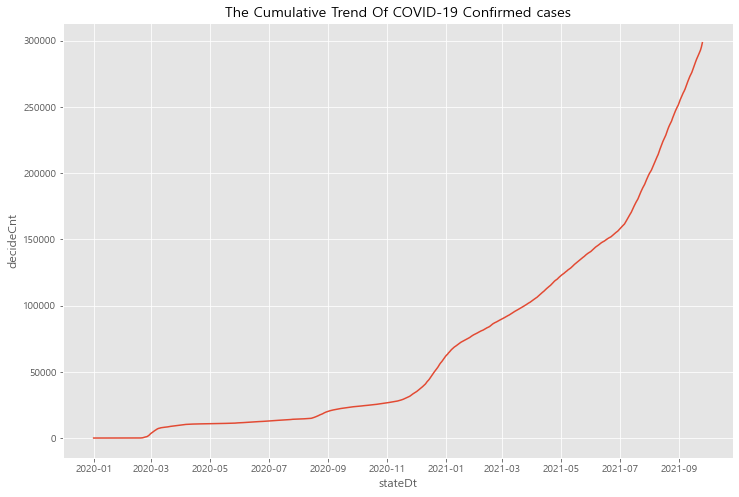

In [7]:
# 코로나 누적 확진자 시각화

plt.figure(figsize=(12,8))
plt.title('The Cumulative Trend Of COVID-19 Confirmed cases')
sns.lineplot(data=covid_data_new, x='stateDt', y='decideCnt')

<AxesSubplot:title={'center':'Daily Trend Of COVID-19 Confirmed Cases'}, xlabel='stateDt', ylabel='daily_decideCnt'>

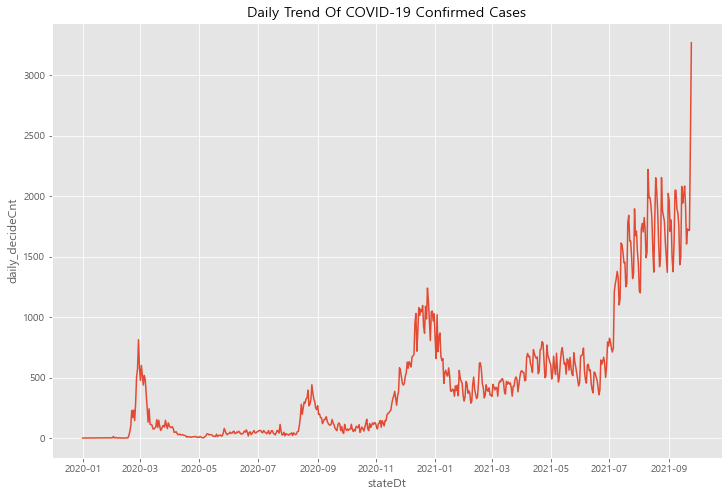

In [8]:
# 코로나 일별 확진자 시각화

plt.figure(figsize=(12,8))
plt.title('Daily Trend Of COVID-19 Confirmed Cases')
sns.lineplot(data=covid_data_new, x='stateDt', y='daily_decideCnt')

<AxesSubplot:title={'center':'The Trend Of COVID-19 Confirmed Cases Per Month'}, xlabel='year,month'>

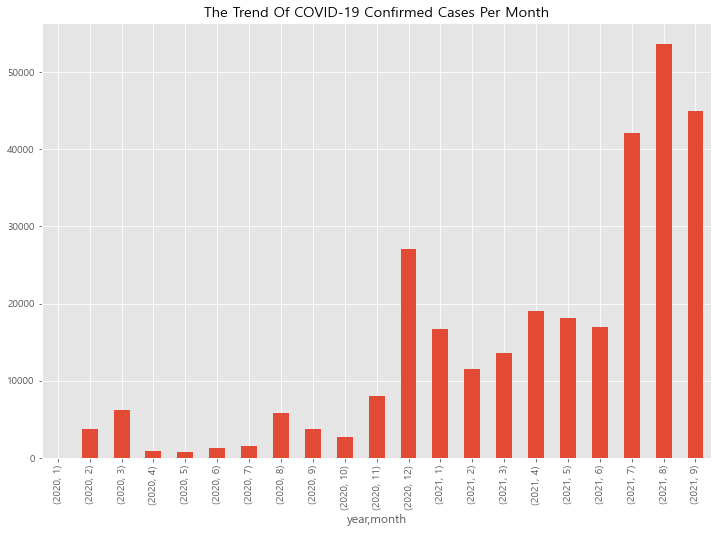

In [9]:
# 코로나 년도별/월별 확진자 시각화

covid_data_new.groupby(['year','month']).daily_decideCnt.sum().plot(kind='bar',figsize=(12,8), title = "The Trend Of COVID-19 Confirmed Cases Per Month")

위 세가지 그래프의 일별/월별/년도별 확진자 확인 결과, 2020년 3월, 2020년 8월, 2020년 12월, 2021년 8월 총 4차례의 대유행이 발생 했음을 알 수 있다. 

In [10]:
# 대유행 기간 확진자 수 추출

covid_data_1st_pandemic=covid_data_new[(covid_data_new.year==2020) & ((covid_data_new.month==2)|(covid_data_new.month==3))]
covid_data_2nd_pandemic=covid_data_new[(covid_data_new.year==2020) & ((covid_data_new.month==8)|(covid_data_new.month==9))]
covid_data_3rd_pandemic=covid_data_new[((covid_data_new.year==2020) & ((covid_data_new.month==12)|(covid_data_new.month==11)))|
                ((covid_data_new.year==2021)&((covid_data_new.month==1)|(covid_data_new.month==2)))]
covid_data_4th_pandemic=covid_data_new[(covid_data_new.year==2021) & ((covid_data_new.month==6)|(covid_data_new.month==7)|(covid_data_new.month==8)|(covid_data_new.month==9))]

<AxesSubplot:title={'center':'Trend Of The 4th Pandemic'}, xlabel='stateDt', ylabel='daily_decideCnt'>

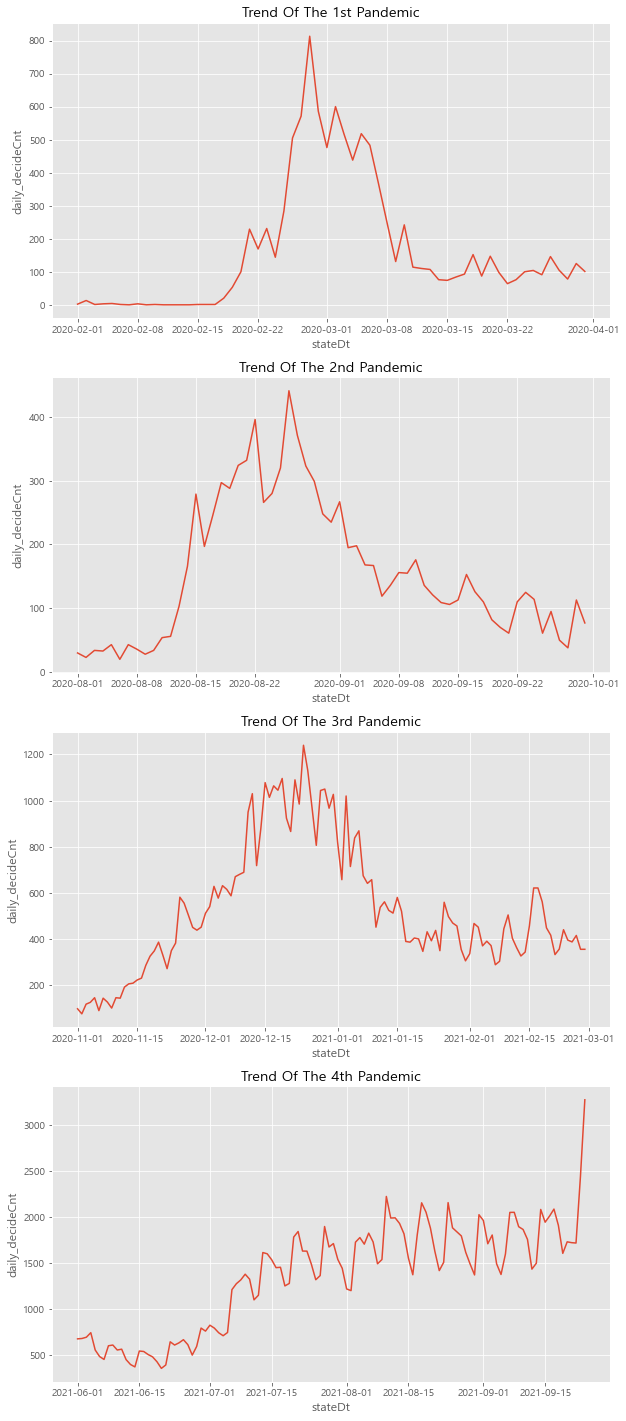

In [11]:
# 대유행 기간 확진자 수 시각화

fig, axes=plt.subplots(nrows=4)
fig.set_size_inches(10,25)

axes[0].set(title='Trend Of The 1st Pandemic')
axes[1].set(title='Trend Of The 2nd Pandemic')
axes[2].set(title='Trend Of The 3rd Pandemic')
axes[3].set(title='Trend Of The 4th Pandemic')

sns.lineplot(data=covid_data_1st_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[0])
sns.lineplot(data=covid_data_2nd_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[1])
sns.lineplot(data=covid_data_3rd_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[2])
sns.lineplot(data=covid_data_4th_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[3])

4차례의 대유행이 시각화로 뚜렷하게 표현되며, 4차 대유행은 여전히 진행중이다.

([<matplotlib.patches.Wedge at 0x280b825ba90>,
 [Text(-0.807759249318728, -0.7466759639495871, '2020'),
  Text(0.8077592143643026, 0.7466760017635258, '2021')],
 [Text(-0.4405959541738516, -0.4072777985179566, '20.7%'),
  Text(0.4405959351078014, 0.40727781914374134, '79.3%')])

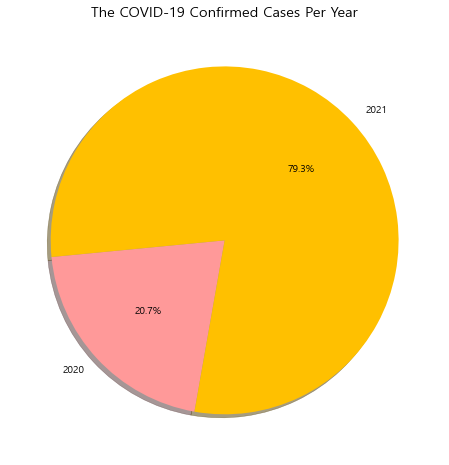

In [12]:
# 코로나 년도별 확진자 시각화

labels=covid_data_new.groupby(['year']).daily_decideCnt.sum().index
values=covid_data_new.groupby(['year']).daily_decideCnt.sum().values
colors = ['#ff9999', '#ffc000']

plt.figure(figsize=(8,8))
plt.title('The COVID-19 Confirmed Cases Per Year')
plt.pie(values, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True, colors=colors)

년도별 코로나 확진자 수를 확인해본 결과, 아직 2021년이 끝나지 않았음에도 불구하고, 2021년의 확진자 수는 2020년의 확진자 수의 4배에 근접한다.

# 고속도로 이용 교통량 추이

In [13]:
# 년도별/분기별 교통량 데이터 가져오기

traffic_2018_01=pd.read_csv('data/2018_01분기.csv',encoding='cp949')
traffic_2018_02=pd.read_csv('data/2018_02분기.csv',encoding='cp949')
traffic_2018_03=pd.read_csv('data/2018_03분기.csv',encoding='cp949')
traffic_2018_04=pd.read_csv('data/2018_04분기.csv',encoding='cp949')
traffic_2019_01=pd.read_csv('data/2019_01분기.csv',encoding='cp949')
traffic_2019_02=pd.read_csv('data/2019_02분기.csv',encoding='cp949')
traffic_2019_03=pd.read_csv('data/2019_03분기.csv',encoding='cp949')
traffic_2019_04=pd.read_csv('data/2019_04분기.csv',encoding='cp949')
traffic_2020_01=pd.read_csv('data/2020_01분기.csv',encoding='cp949')
traffic_2020_02=pd.read_csv('data/2020_02분기.csv',encoding='cp949')
traffic_2020_03=pd.read_csv('data/2020_03분기.csv',encoding='cp949')
traffic_2020_04=pd.read_csv('data/2020_04분기.csv',encoding='cp949')
traffic_2021_01=pd.read_csv('data/2021_01분기.csv',encoding='cp949')
traffic_2021_02=pd.read_csv('data/2021_02분기.csv',encoding='cp949')

In [14]:
# 분기별 데이터 하나의 데이터로 합치기

traffic_data=pd.concat([traffic_2018_01,traffic_2018_02,traffic_2018_03,traffic_2018_04,
                        traffic_2019_01,traffic_2019_02,traffic_2019_03,traffic_2019_04,
                        traffic_2020_01,traffic_2020_02,traffic_2020_03,traffic_2020_04,
                        traffic_2021_01,traffic_2021_02])

In [15]:
# 필요 칼럼만 추출
# 정수형 집계일자를 Datetime형 집계일자로 변환 후 인덱스로 설정
# 일별 년도/월/요일 칼럼 추가

traffic_data.index=traffic_data.집계일자
traffic_data=traffic_data.drop('집계일자',axis=1)
traffic_data=traffic_data[['영업소명','1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량']]
traffic_data.index=pd.to_datetime(traffic_data.index, format='%Y%m%d')
traffic_data['year']=traffic_data.index.year 
traffic_data['month']=traffic_data.index.month
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
traffic_data['day_of_week']=traffic_data.index.dayofweek 
traffic_data.day_of_week=traffic_data.day_of_week.apply(lambda x : days[x])
traffic_data.head()

,영업소명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,,
2018-01-01,가락,211,6,6,21,27,4,275,2018,1,MON
2018-01-01,가락,615,14,5,14,96,26,770,2018,1,MON
2018-01-01,가락(개),2358,31,48,57,131,273,2898,2018,1,MON
2018-01-01,가락(개),7148,27,71,27,267,378,7918,2018,1,MON
2018-01-01,가락(개),2946,29,52,48,150,357,3582,2018,1,MON


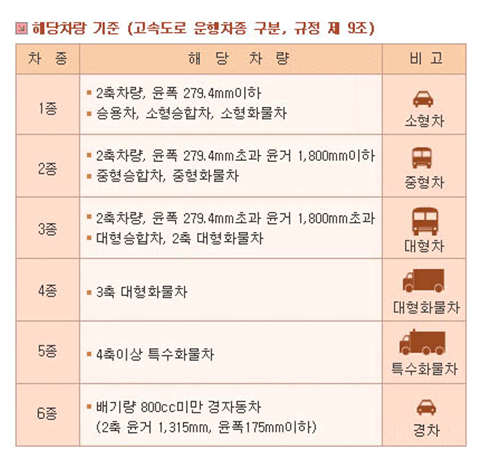

In [16]:
# 명칭이 불규칙하여 통일

traffic_data=traffic_data.replace('서서울영업소','서서울')
traffic_data=traffic_data.replace('서울영업소','서울')
traffic_data=traffic_data.replace('서대구영업소','서대구')
traffic_data=traffic_data.replace('북대구영업소','북대구')
traffic_data=traffic_data.replace('남대구영업소','남대구')
traffic_data=traffic_data.replace('북강릉영업소','북강릉')
traffic_data=traffic_data.replace('남강릉영업소','남강릉')
traffic_data=traffic_data.replace('강릉영업소','강릉')

## 전국 교통량 분석

In [30]:
# 모든 곳의 톨게이트에 대한 교통량 합산

traffic_data_total=traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
traffic_data_total['year']=traffic_data_total.index.year
traffic_data_total['month']=traffic_data_total.index.month
traffic_data_total['day']=traffic_data_total.index.day
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
traffic_data_total['day_of_week']=traffic_data_total.index.dayofweek
traffic_data_total.day_of_week=traffic_data_total.day_of_week.apply(lambda x : days[x])

# 년도별 저장

traffic_data_2018=traffic_data_total[traffic_data_total.year==2018]
traffic_data_2019=traffic_data_total[traffic_data_total.year==2019]
traffic_data_2020=traffic_data_total[traffic_data_total.year==2020]
traffic_data_2021=traffic_data_total[traffic_data_total.year==2021]

# 코로나 기간 저장

traffic_data_2020_2021=traffic_data_total[(traffic_data_total.year==2020)|(traffic_data_total.year==2021)]

<AxesSubplot:title={'center':'The Traffic Trend By Year And Month'}, xlabel='month', ylabel='총교통량'>

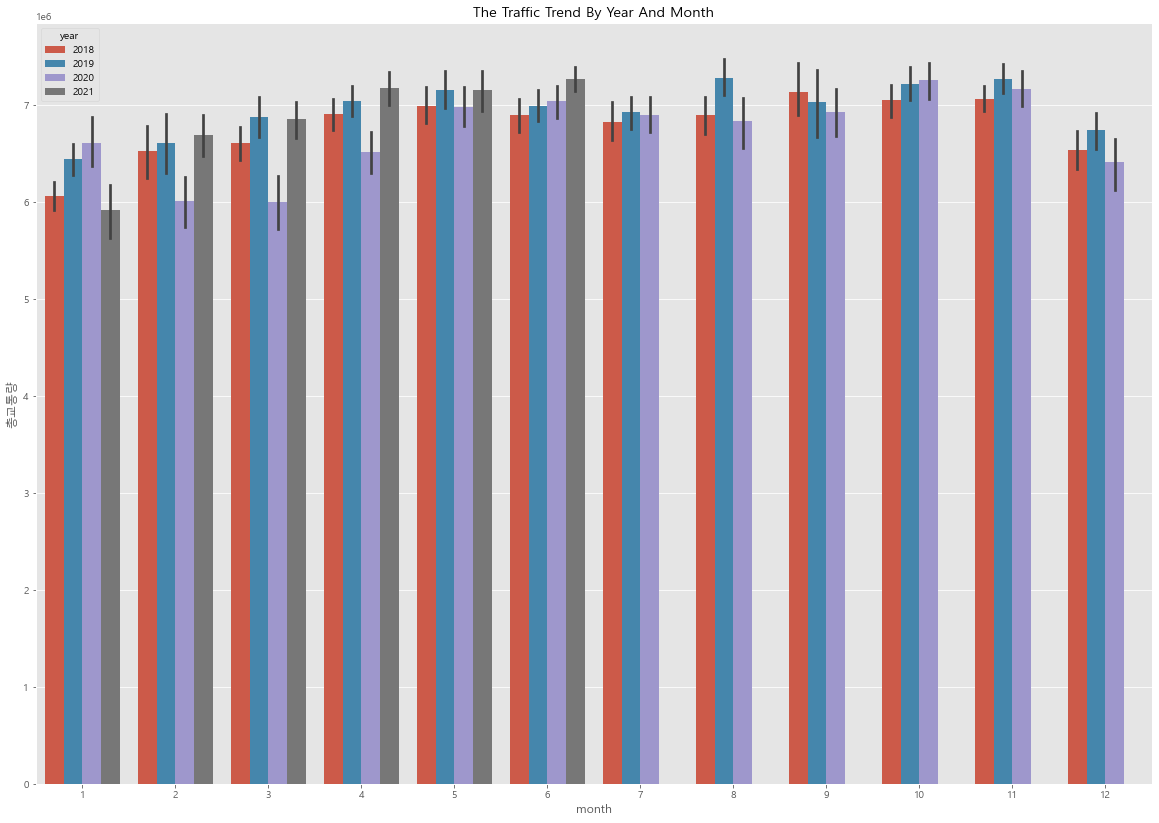

In [19]:
# 월별, 연도별 총교통량 추이

plt.figure(figsize=(20,14))
plt.title('The Traffic Trend By Year And Month')
sns.barplot(x='month', y='총교통량',hue='year',data=traffic_data_total)

월단위로 비교해보았을 때, 코로나 확산이 본격적으로 시작된 2020년 2월 이후로부터 관찰해보면 2020년도 대비 2021년도가 월별 교통량이 더 많은 것을 확인할 수 있다. 또한, 1월을 제외하고는 2021년의 교통량이 코로나가 없던 2018년, 2019년의 교통량보다도 더 많은 것을 확인할 수 있다.  
이에 따라 코로나의 진행이 계속됨에 따라 국민들의 코로나19에 대한 경각심이 줄어들었다고 예측해볼 수 있다.

In [20]:
# 요일별 차종 평균 교통량

day_traffic_data_1st=traffic_data.groupby('day_of_week')['1종교통량'].mean()
day_traffic_data_remain=traffic_data.groupby('day_of_week')['2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량'].mean()
day_traffic_data_total=traffic_data.groupby('day_of_week')['총교통량'].mean() 

<AxesSubplot:title={'center':'The Average Traffic Volume By Day'}, xlabel='day_of_week'>

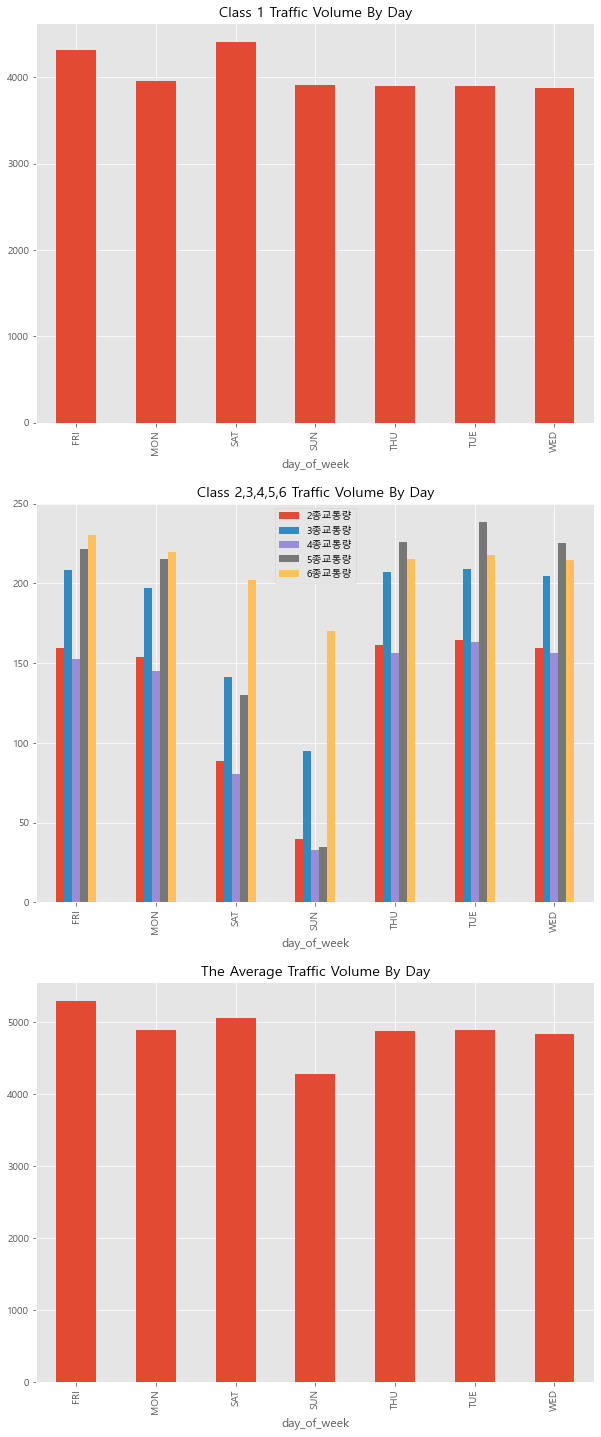

In [21]:
# 요일별 차종 평균 그래프 시각화

fig, axes=plt.subplots(nrows=3)
fig.set_size_inches(10,25)

axes[0].set(title='Class 1 Traffic Volume By Day')
axes[1].set(title='Class 2,3,4,5,6 Traffic Volume By Day')
axes[2].set(title='The Average Traffic Volume By Day')

traffic_data_2020_2021.plot(kind='bar',ax=axes[0])
traffic_data_2020_2021.plot(kind='bar',ax=axes[1])

요일별 교통량을 확인해본 결과, 1종 교통의 교통량은 요일과 관계없이 거의 비슷하다.
2종부터 6종까지의 교통량은 주말이 적으며, 평일이 많다.
이는 근무를 위해 움직이는 사람들의 교통량에 의해서 많다고 생각되어지며,
개인적인 일로 움직이는 교통량을 확인하기 위해서는 주말의 교통량을 확인해볼 필요가 있다고 생각된다.
또한, 1종 교통량 혹은 총 교통량보다는 나머지 교통량을 확인해보는 것이 뚜렷한 변화를 확인해볼 수 있을 것 같다.

### 교통량 추이 확인 - 1종 교통량

<AxesSubplot:title={'center':"\nTrend Of Seoul's First Class Traffic On Sunday (2020-2021)\n"}, xlabel='집계일자', ylabel='1종교통량'>

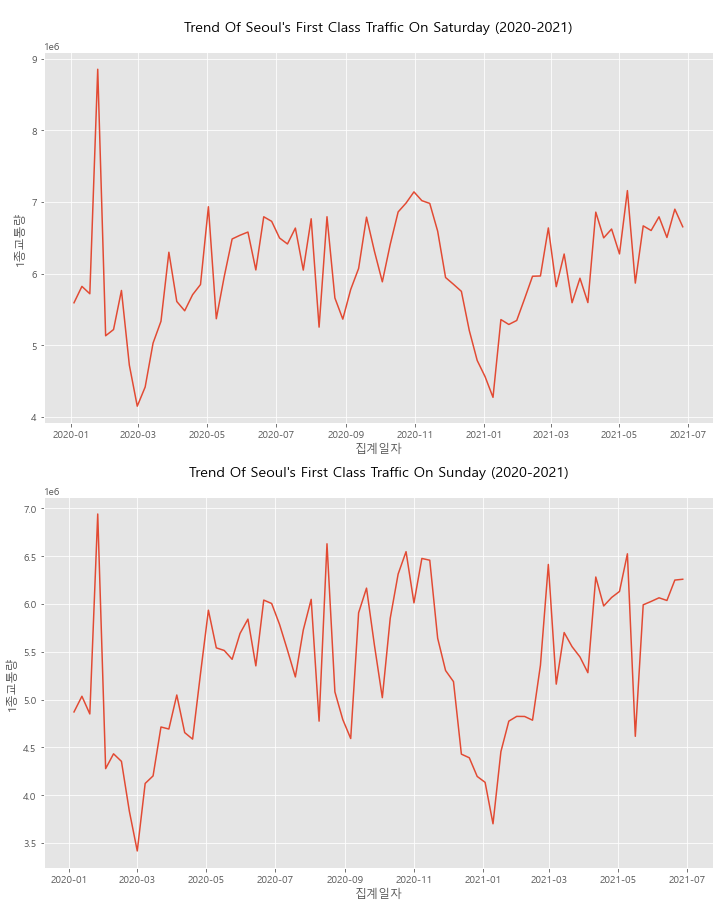

In [35]:
# 요일별 차종 평균 그래프 시각화

fig, axes=plt.subplots(nrows=2)
fig.set_size_inches(12,15)

axes[0].set(title='\nTrend Of Seoul\'s First Class Traffic On Saturday (2020-2021)\n')
axes[1].set(title='\nTrend Of Seoul\'s First Class Traffic On Sunday (2020-2021)\n')

sns.lineplot(data=traffic_data_2020_2021[(traffic_data_total.day_of_week=='SAT')], x='집계일자', y='1종교통량', ax=axes[0])
sns.lineplot(data=traffic_data_2020_2021[(traffic_data_total.day_of_week=='SUN')], x='집계일자', y='1종교통량', ax=axes[1])

### 교통량 추이 확인 - 2종 교통량

In [ ]:
# 1종 교통량(대부분의 자가용) 일요일 분석

plt.figure(figsize=(25,10))
plt.title('The Trend Of Type fist Traffic On Saturdays (2020-2021)\n')
sns.lineplot(data=traffic_data_total[(traffic_data_total.day_of_week=='SAT')&((traffic_data_total.year==2020)|(traffic_data_total.year==2021))], x='집계일자', y='1종교통량')